In [1]:
import numpy as np 
import random
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from time import time
from packing import Individual, Population, Circle, Rect

import pickle

random.seed(0)
np.random.seed(0)

In [2]:
def load_data(filename):
    path = Path("../data") / str("r" + filename + ".csv")
    data = pd.read_csv(path, header=None)
    data.columns = ["width", "height", "value"]
    return data

In [3]:
r800 = load_data("800")
r800

,width,height,value
0,250,120,100
1,320,160,500
2,250,160,600
3,150,120,40
4,400,30,400


## definition of an individual

an one individual is a set of rectangles that are properly fit inside a circle of given radius. These rectangles should not overlap and should be fully contained in the circle

False
False
109


<Axes: title={'center': 'Score: 109'}>

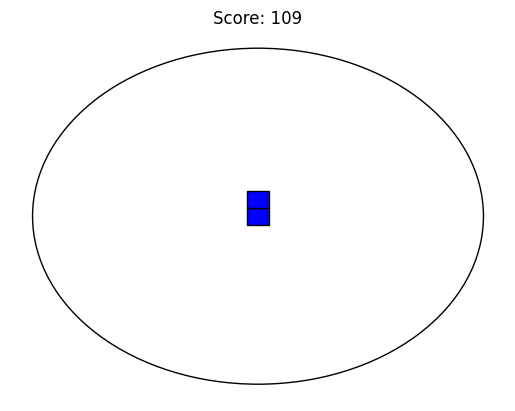

In [4]:
individual = Individual([Rect(0,0, 1,1, 100), Rect(0, 1, 1, 1, 9)], 10)

print(individual.is_collision())
print(individual.is_any_outside_circle())
print(individual.score())

individual.plot()

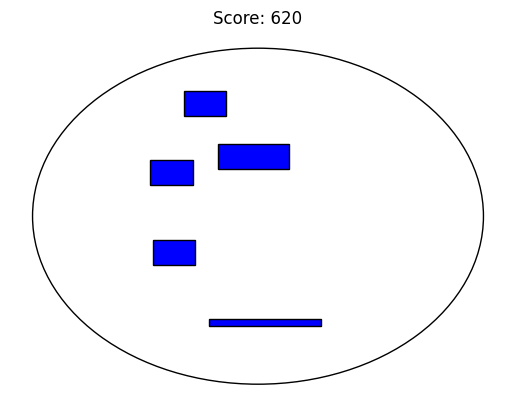

In [5]:
individual = Individual([], 800)

df = load_data("800")

for _ in range(5):
    rect = individual.generate_rect_from_data(df)
    
    
    
ax = individual.plot()

plt.show()

<Axes: title={'center': 'Score: 1120'}>

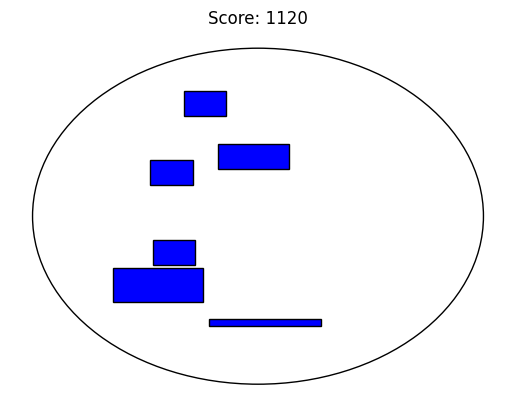

In [6]:
individual.mutate("move", magnitude_move=1, how_many_move=0.3, collide_strategy="skip")
individual.mutate("add", rect_data=df)
individual.plot()


<Axes: title={'center': 'Score: 1120'}>

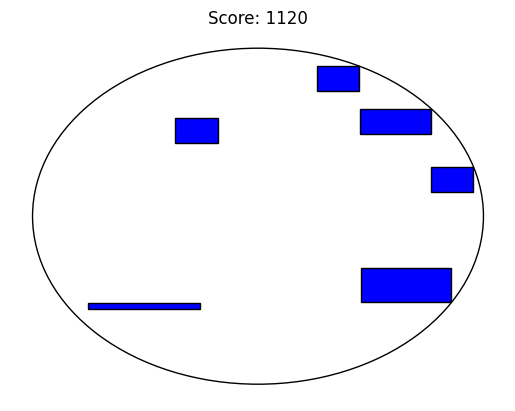

In [7]:
individual.mutate("slide", magnitude_move=5, how_many_move=1)
#individual.mutate("add", rect_data=df)
individual.plot()


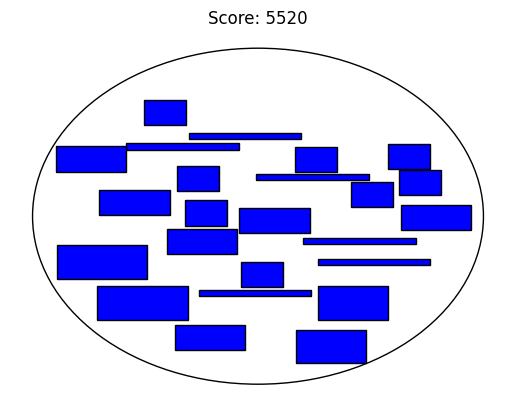

In [8]:
individual1 = Individual([], 800)
individual2 = Individual([], 800)

new_individual1 = Individual([], 800)
new_individual2 = Individual([], 800)

for _ in range(20):
    rect = individual1.generate_rect_from_data(df)
    rect = individual2.generate_rect_from_data(df)
    
new_individual1, new_individual2 = Individual.crossover(individual1, individual2, axis="x", add_new_rects=True, rect_data=df)
new_individual2.plot()
plt.show()

### population testing

In [49]:
population = Population(800, df, p = [1/4] * 4)


scores = []
mean_scores = []
for _ in range(20):
    population = Population(800, df, p = [1/4] * 4)
    population.generate_population(10)
    scores.append(population.best_individual().score())
    mean_scores.append(population.scores().mean())


In [50]:
population = Population(800, df)


scores_p = []
mean_scores_p = []
for _ in range(20):
    population = Population(800, df, rect_temp=0.01)
    population.generate_population(10)
    scores_p.append(population.best_individual().score())
    mean_scores_p.append(population.scores().mean())


In [56]:
scores = scores["random_best"]

In [57]:
scores = pd.DataFrame({"random_best": scores, "p_best": scores_p, "random_mean": mean_scores, "p_mean": mean_scores_p})

<Axes: >

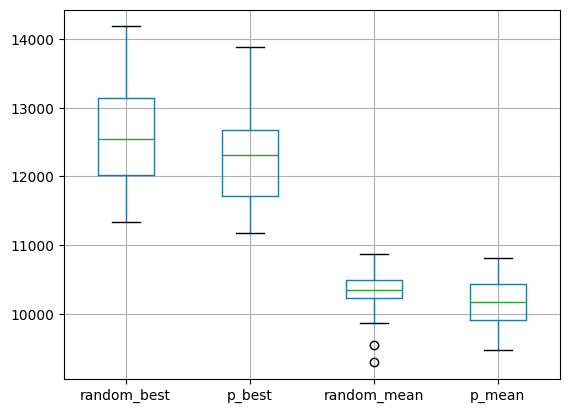

In [58]:
scores.boxplot()

<Axes: title={'center': 'Score: 12360'}>

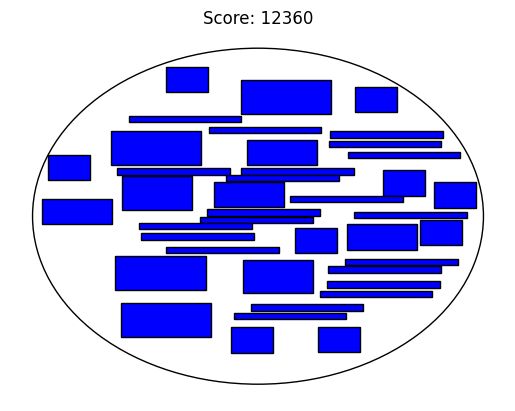

In [59]:
population.mutate(type=["move", "add"], how_many_rects_move=0.3, magnitude_move=0.001, collide_strategy="skip")

population.best_individual().plot()

<Axes: title={'center': 'Score: 15520'}>

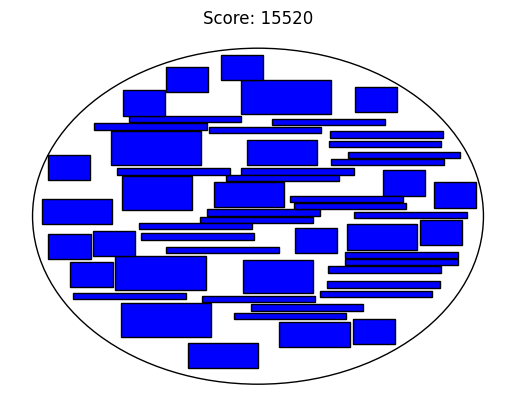

In [60]:
population.mutate(type=["move", "add"], how_many_rects_move=0.3, magnitude_move=0.001, collide_strategy="remove")
population.crossover()
population.best_individual().plot()

<Axes: title={'center': 'Score: 13520'}>

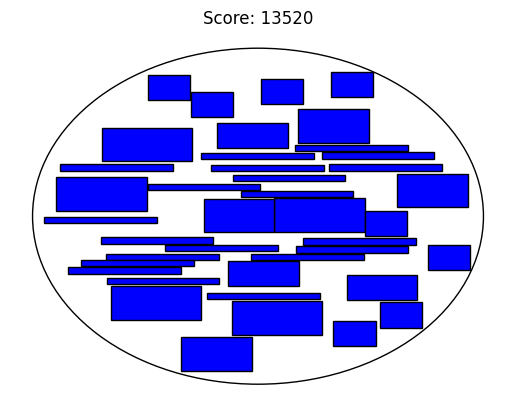

In [11]:
population.best_individual().plot()

## Evaluations
### Dataset 800
minimum value - 30000

In [61]:
df = load_data("800")

In [65]:
population = Population(800, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=60, n_individuals=10, iterations=50, elite=0.1, type=["slide", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/800/population10individuals.pkl", "wb") as f:
    pickle.dump(population, f)

Generation: 0
Best individual score in generation 0: 16680
Average individual score in generation 0: 15414.0
Generation time: 4.421019792556763
Generation: 1
Best individual score in generation 1: 17820
Average individual score in generation 1: 16720.0
Generation time: 4.293919086456299
Generation: 2
Best individual score in generation 2: 19220
Average individual score in generation 2: 17990.0
Generation time: 4.540658235549927
Generation: 3
Best individual score in generation 3: 20460
Average individual score in generation 3: 19012.0
Generation time: 3.58856463432312
Generation: 4
Best individual score in generation 4: 23100
Average individual score in generation 4: 20526.0
Generation time: 5.766922950744629
Generation: 5
Best individual score in generation 5: 23100
Average individual score in generation 5: 21028.0
Generation time: 4.634850740432739
Generation: 6
Best individual score in generation 6: 23640
Average individual score in generation 6: 22174.0
Generation time: 5.681973457

Text(0.5, 1.0, 'Scores over generations /nfor 60 generations and 10 individuals')

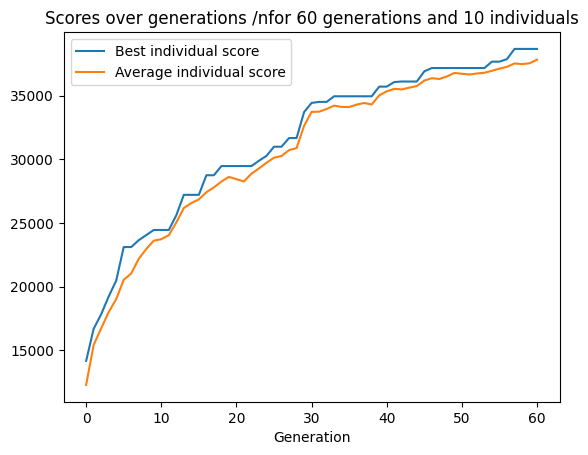

In [66]:

with open("../results/800/population10individuals.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual score")
plt.plot(avg_individual_scores, label="Average individual score")
plt.legend()
plt.xlabel("Generation")
plt.title("Scores over generations /nfor 60 generations and 10 individuals")

### dataset 850

brak wymagań

In [17]:
data = load_data("850")

In [18]:
population = Population(850, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/850/population30individuals.pkl", "wb") as f:
    pickle.dump(population, f)
    

Generation: 0
Best individual score in generation 0: 18080
Average individual score in generation 0: 14615.333333333334
Generation time: 5.472066640853882
Generation: 1
Best individual score in generation 1: 19980
Average individual score in generation 1: 16460.0
Generation time: 6.903483867645264
Generation: 2
Best individual score in generation 2: 21580
Average individual score in generation 2: 18930.0
Generation time: 6.9385809898376465
Generation: 3
Best individual score in generation 3: 22800
Average individual score in generation 3: 20351.333333333332
Generation time: 11.155208587646484
Generation: 4
Best individual score in generation 4: 22800
Average individual score in generation 4: 20948.666666666668
Generation time: 9.638731718063354
Generation: 5
Best individual score in generation 5: 23660
Average individual score in generation 5: 21942.666666666668
Generation time: 9.315574169158936
Generation: 6
Best individual score in generation 6: 25280
Average individual score in gen

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 850')

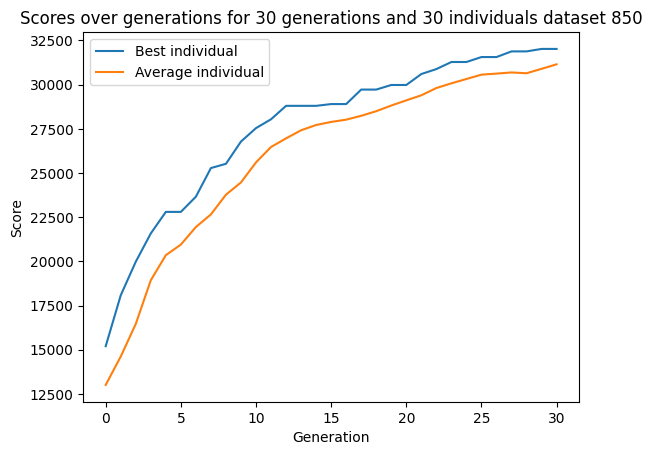

In [19]:

with open("../results/850/population30individuals.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 850")

### dataset 1000

17500 minimum

In [6]:
data = load_data("1000")
population = Population(1000, df, temperature=1000)
best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=30, iterations=50, elite=0.1, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/1000/population30ind.pkl", "wb") as f:
    pickle.dump(population, f)

Generation: 0
Best individual score in generation 0: 19500
Average individual score in generation 0: 15854.0
Generation time: 1.6659643650054932
Generation: 1
Best individual score in generation 1: 21800
Average individual score in generation 1: 19120.666666666668
Generation time: 2.101935386657715
Generation: 2


KeyboardInterrupt: 

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 1000')

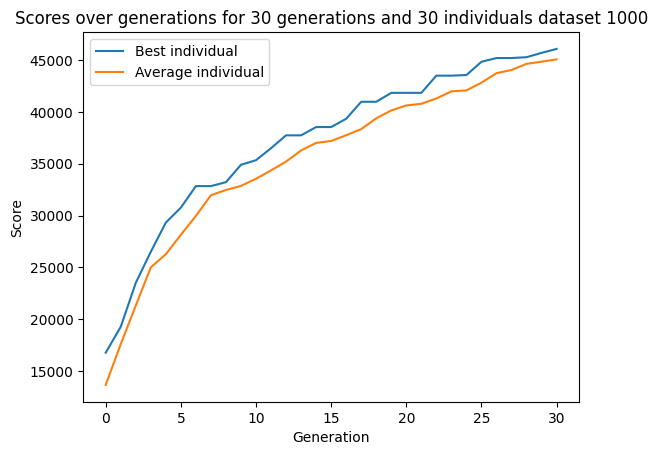

In [23]:

with open("../results/1000/population30ind.pkl", "rb") as f:
    population = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 1000")

## 1100
25000 minimum

In [7]:
data = load_data("1100")

population = Population(1100, data, temperature=1000)

best_individual_scores, avg_individual_scores, times = population.run(n_generations=60, n_individuals=30, iterations=50, elite=0.1, type=["slide", "add"], axis="both", how_many_rects_move=1, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/1100/30ind.pkl", "wb") as f:
    pickle.dump((best_individual_scores, avg_individual_scores, times, population), f)

Generation: 0
Best individual score in generation 0: 13560
Average individual score in generation 0: 11584.0
Generation time: 2.30936598777771
Generation: 1
Best individual score in generation 1: 15280
Average individual score in generation 1: 12805.333333333334
Generation time: 3.6567604541778564
Generation: 2
Best individual score in generation 2: 15280
Average individual score in generation 2: 13792.0
Generation time: 7.986746549606323
Generation: 3
Best individual score in generation 3: 15420
Average individual score in generation 3: 14331.333333333334
Generation time: 9.46850323677063
Generation: 4
Best individual score in generation 4: 15780
Average individual score in generation 4: 14524.666666666666
Generation time: 8.52849268913269
Generation: 5
Best individual score in generation 5: 15780
Average individual score in generation 5: 14718.666666666666
Generation time: 9.8369722366333
Generation: 6
Best individual score in generation 6: 16760
Average individual score in generatio

<Axes: title={'center': 'Score: 21200'}>

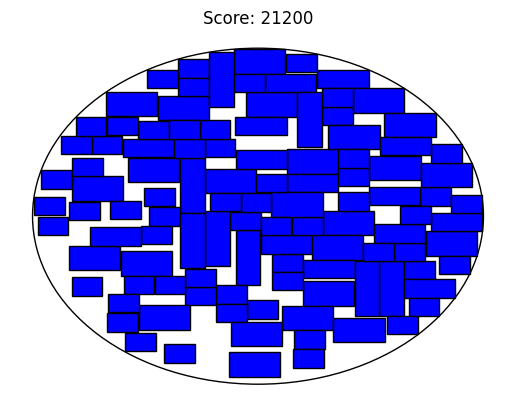

In [9]:
population.best_individual().plot()

Text(0.5, 1.0, 'Scores over generations for 60 generations and 30 individuals dataset 1100')

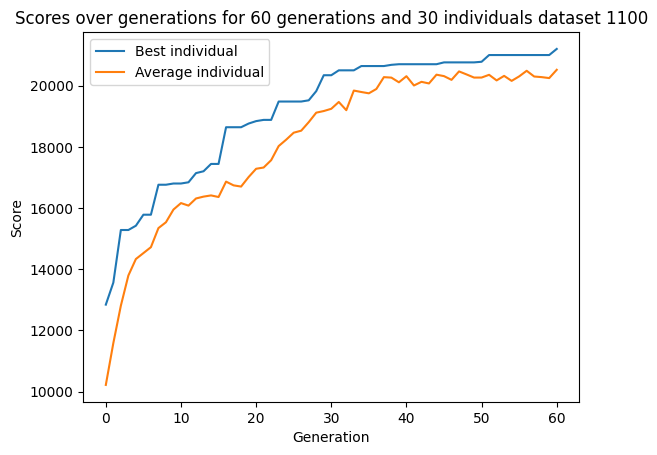

In [8]:

with open("../results/1100/30ind.pkl", "rb") as f:
    (best_individual_scores, avg_individual_scores, times, population) = pickle.load(f)
    

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 60 generations and 30 individuals dataset 1100")

Text(0.5, 1.0, 'Scores over generations for 30 generations and 5 individuals dataset 1100')

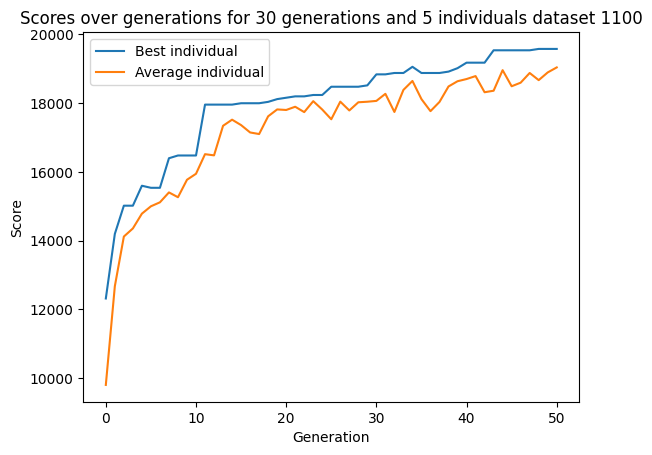

In [7]:

with open("../results/1100/5ind.pkl", "rb") as f:
    (best_individual_scores, avg_individual_scores, times, population) = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 5 individuals dataset 1100")

# 1200
30000 minimum

In [28]:
data = load_data("1200")

population = Population(1200, data, temperature=1000)

best_individual_scores, avg_individual_scores, times = population.run(n_generations=100, n_individuals=100, iterations=50, elite=0.1, type=["slide", "add"], mutation_probs=[0.7, 0.3], axis="both", how_many_rects_move=1, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10)

with open("../results/1200/100ind.pkl", "wb") as f:
    pickle.dump((best_individual_scores, avg_individual_scores, times, population), f)

Generation: 0
Best individual score in generation 0: 15760
Average individual score in generation 0: 13501.6
Generation time: 15.135213613510132
Generation: 1
Best individual score in generation 1: 17620
Average individual score in generation 1: 14964.4
Generation time: 13.750962495803833
Generation: 2
Best individual score in generation 2: 18740
Average individual score in generation 2: 16389.6
Generation time: 21.949640035629272
Generation: 3
Best individual score in generation 3: 19780
Average individual score in generation 3: 17456.2
Generation time: 24.244274854660034
Generation: 4
Best individual score in generation 4: 20600
Average individual score in generation 4: 18442.6
Generation time: 29.822006225585938
Generation: 5
Best individual score in generation 5: 21000
Average individual score in generation 5: 19243.2
Generation time: 32.12109661102295
Generation: 6
Best individual score in generation 6: 21740
Average individual score in generation 6: 19816.4
Generation time: 21.37

KeyboardInterrupt: 

In [25]:
best_individual_scores2, avg_individual_scores2, times2 = population.run(n_generations=50, n_individuals=50, iterations=50, elite=0.1, type=["slide", "add"], mutation_probs=[0.7, 0.3], axis="both", how_many_rects_move=1, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10, resume=True)


best_individual_scores = best_individual_scores + best_individual_scores2
avg_individual_scores = avg_individual_scores + avg_individual_scores2
times = times + times2

with open("../results/1200/50ind.pkl", "wb") as f:
    pickle.dump((best_individual_scores, avg_individual_scores, times, population), f)

Generation: 0
Best individual score in generation 0: 27700
Average individual score in generation 0: 26828.0
Generation time: 15.77442479133606
Generation: 1
Best individual score in generation 1: 27700
Average individual score in generation 1: 26984.0
Generation time: 19.48727512359619
Generation: 2
Best individual score in generation 2: 27700
Average individual score in generation 2: 27118.0
Generation time: 20.169084548950195
Generation: 3
Best individual score in generation 3: 27700
Average individual score in generation 3: 26876.666666666668
Generation time: 16.83457899093628
Generation: 4
Best individual score in generation 4: 27700
Average individual score in generation 4: 27050.666666666668
Generation time: 18.165931940078735
Generation: 5
Best individual score in generation 5: 27700
Average individual score in generation 5: 27058.666666666668
Generation time: 18.666630506515503
Generation: 6
Best individual score in generation 6: 27700
Average individual score in generation 6:

In [26]:
best_individual_scores2, avg_individual_scores2, times2 = population.run(n_generations=50, n_individuals=50, iterations=50, elite=0.1, type=["slide", "add"], mutation_probs=[0.7, 0.3], axis="both", how_many_rects_move=1, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=10, resume=True)


best_individual_scores = best_individual_scores + best_individual_scores2
avg_individual_scores = avg_individual_scores + avg_individual_scores2
times = times + times2

with open("../results/1200/50ind.pkl", "wb") as f:
    pickle.dump((best_individual_scores, avg_individual_scores, times, population), f)

Generation: 0
Best individual score in generation 0: 28880
Average individual score in generation 0: 28152.0
Generation time: 27.93010711669922
Generation: 1
Best individual score in generation 1: 28880
Average individual score in generation 1: 28370.0
Generation time: 26.28638744354248
Generation: 2
Best individual score in generation 2: 28880
Average individual score in generation 2: 28357.333333333332
Generation time: 25.205623865127563
Generation: 3
Best individual score in generation 3: 28880
Average individual score in generation 3: 28459.333333333332
Generation time: 25.05917978286743
Generation: 4
Best individual score in generation 4: 28880
Average individual score in generation 4: 28230.0
Generation time: 27.027141571044922
Generation: 5
Best individual score in generation 5: 28880
Average individual score in generation 5: 28036.666666666668
Generation time: 23.807706832885742
Generation: 6
Best individual score in generation 6: 28880
Average individual score in generation 6:

KeyboardInterrupt: 

In [24]:
best_individual_scores[51]

27700

<Axes: title={'center': 'Score: 28880'}>

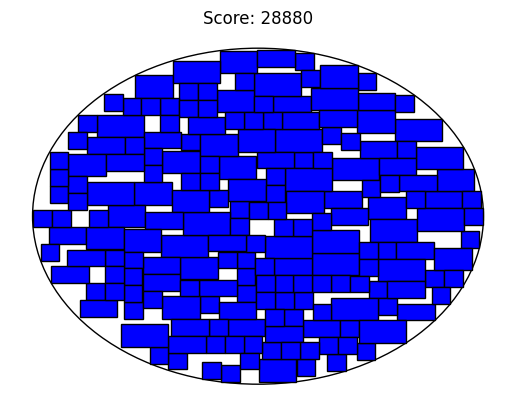

In [27]:
population.best_individual().plot()

In [12]:
data = load_data("1200")

population = Population(1200, data, temperature=500)

best_individual_scores, avg_individual_scores, times = population.run(n_generations=30, n_individuals=50, iterations=50, elite=1/10, type=["move", "add"], axis="both", how_many_rects_move=0.5, magnitude_move=1, collide_strategy="skip", add_new_rects=True, add_new_rects_iterations=20)

with open("../results/1200/50ind.pkl", "wb") as f:
    pickle.dump((best_individual_scores, avg_individual_scores, times, population), f)

Generation: 0
Best individual score in generation 0: 17400
Average individual score in generation 0: 16085.6
Generation time: 2.4665088653564453
Generation: 1


KeyboardInterrupt: 

<Axes: title={'center': 'Score: 25420'}>

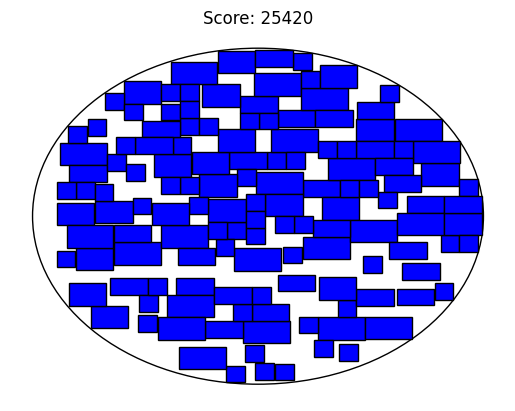

In [16]:
population.best_individual().plot()

Text(0.5, 1.0, 'Scores over generations for 30 generations and 30 individuals dataset 1200')

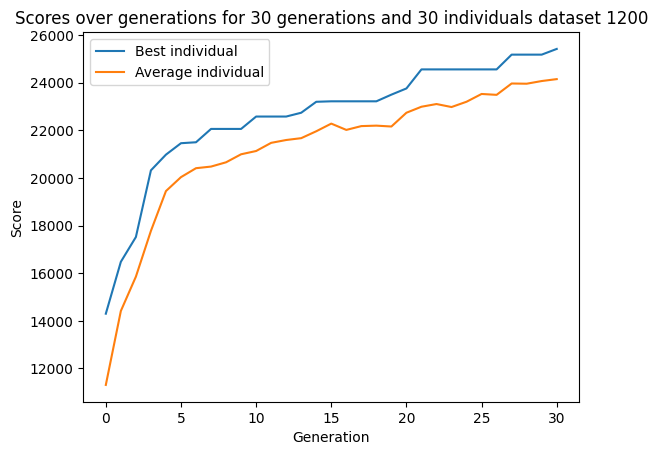

In [19]:

with open("../results/1200/30ind.pkl", "rb") as f:
    (best_individual_scores, avg_individual_scores, times, population) = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 30 individuals dataset 1200")

Text(0.5, 1.0, 'Scores over generations for 30 generations and 50 individuals dataset 1200')

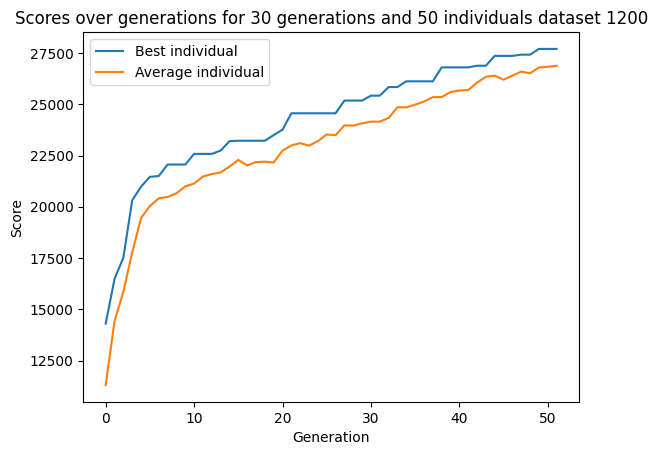

In [22]:

with open("../results/1200/50ind.pkl", "rb") as f:
    (best_individual_scores, avg_individual_scores, times, population) = pickle.load(f)

plt.plot(best_individual_scores, label="Best individual")
plt.plot(avg_individual_scores, label="Average individual")
plt.ylabel("Score")
plt.xlabel("Generation")
plt.legend()
plt.title("Scores over generations for 30 generations and 50 individuals dataset 1200")